# 根据fake_tweets产生的数据文件进行分析

In [1]:
from my_weapon import *
from collections import defaultdict, Counter

In [2]:
url_tweets = json.load(open("data/fake-url-tweets.json"))

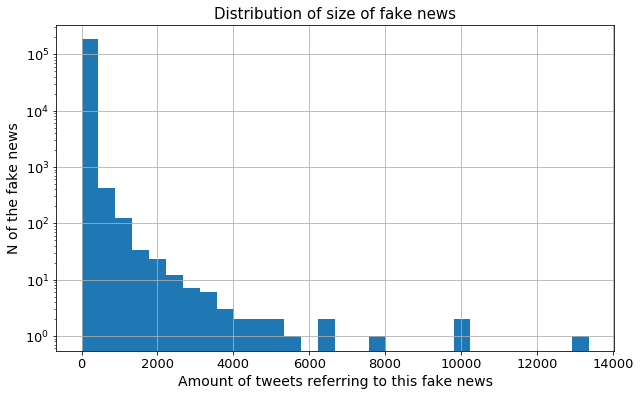

In [3]:
# x, cdf, pdf = get_cdf_pdf(data, 0, 15000, 100)
plt.figure(figsize=(10, 6))
data = pd.Series([len(url_tweet["tweets"]) for url_tweet in url_tweets])
data.hist(bins=30)
plt.title('Distribution of size of fake news', fontsize=15)
plt.ylabel('N of the fake news', fontsize=14)
plt.xlabel('Amount of tweets referring to this fake news', fontsize=14)
plt.xticks(fontsize=13); plt.yticks(fontsize=13)
plt.yscale("log")
plt.savefig('fig/distribution_size_fake_news.pdf', dpi=300)
plt.show()
plt.close()

In [4]:
url_tweets[88888]

{'url': 'http://thepoliticalinsider.com/secret-service',
 'tweets': [{'tweet_id': '771072785854570496',
   'user_id': '32144891',
   'dt': '2016-08-31 14:50:52',
   'is_first': 1,
   'is_source': 1,
   'is_IRA': 0,
   'URL': 'http://thepoliticalinsider.com/secret-service',
   'hostname': 'thepoliticalinsider.com'},
  {'tweet_id': '771073146879291392',
   'user_id': '533402213',
   'dt': '2016-08-31 14:52:18',
   'is_first': 0,
   'is_source': 0,
   'is_IRA': 0,
   'URL': 'http://thepoliticalinsider.com/secret-service',
   'hostname': 'thepoliticalinsider.com'}]}

- 189620条谣言URL, 914272条初始推特；
- 25212个第一条谣言的用户, 88215个发初始推特的用户；

### 专门针对用户的分析，放到analyze_users.ipy中～

In [5]:
import pendulum


def get_day(dt):
    return pendulum.parse(dt).format("YYYY-MM-DD 00:00:00")
    
    
def get_hour(dt):
    return pendulum.parse(dt).format("YYYY-MM-DD HH:00:00")
    

def cal_ts_day(dts):
    start = get_day(dts[0])
    end = get_day(dts[-1])
    rng = pd.date_range(start, end, freq='D')
    ts = pd.Series(0, rng)
    for dt in dts:
        now = get_day(dt)
        ts[now] += 1
    return ts


def cal_ts_48hours(dts):
    start = get_hour(dts[0])
    rng = pd.date_range(start, periods=48, freq="H")
    ts = pd.Series(0, rng)
    for dt in dts:
        now = get_hour(dt)
        if now in ts:
            ts[now] += 1
    return ts
    
    
def plot_day(i, url, sorted_dts, sorted_dts2=None, save=False):
    """
    包含了两条线！
    """

    plt.figure(figsize=(10, 6))
    ts = cal_ts_day(sorted_dts)
    ts.plot()
    
    if sorted_dts2:
        ts2 = cal_ts_day(sorted_dts2)
        ts2.plot()
    
    # configure
    plt.ylabel('N of tweets with this fake news', fontsize=15)
    plt.xticks(fontsize=11); plt.yticks(fontsize=11)
#     plt.xlabel('$Date$', fontsize=15)
#     plt.title(url)
    
    if save:
        plt.savefig('fig/{}-{}-overall-spread.pdf'.format(i, url), dpi=300)
    else:
        plt.show()
    
    plt.close()


def plot_48hours(i, url, sorted_dts, sorted_dts2=None, save=False):
    """
    包含了两条线！
    """
    
#     print(url)
#     print("实际传播开始和结束时间：", sorted_dts[0], sorted_dts[-1])

    plt.figure(figsize=(10, 6))
    ts = cal_ts_48hours(sorted_dts)
    ts.plot()
    
    if sorted_dts2:
        ts2 = cal_ts_48hours(sorted_dts2)
        ts2.plot()

    
    # configure
    plt.ylabel('N of tweets with this fake news', fontsize=15)
    plt.xticks(fontsize=11); plt.yticks(fontsize=11)
#     plt.xlabel('$Date$', fontsize=15)
#     plt.title(url)

    if save:
        plt.savefig('fig/{}-{}-first-48-hours.pdf'.format(i, url), dpi=300)
    else:
        plt.show()
        
    plt.close()


plot 1 ~


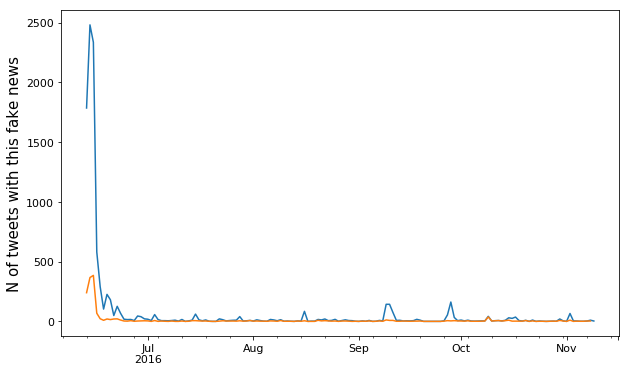

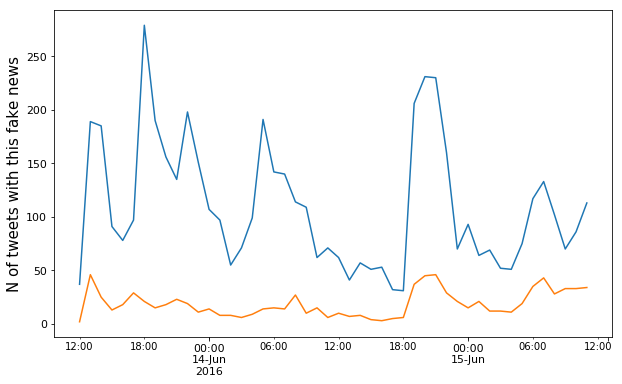

plot 2 ~


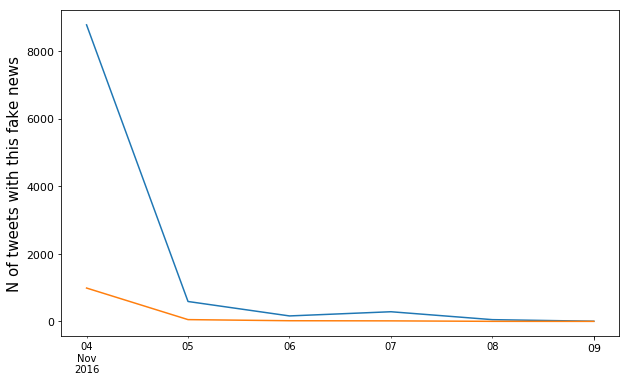

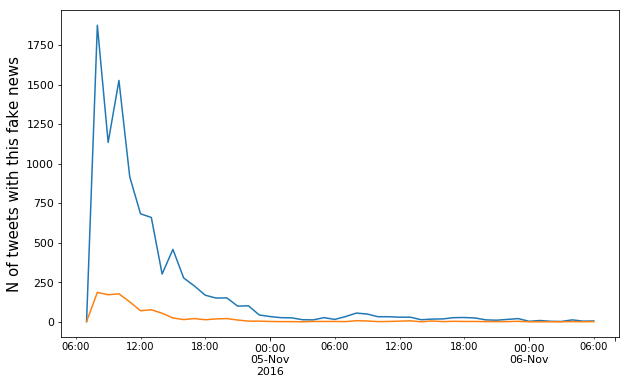

In [6]:
for i, url_tweet in enumerate(url_tweets):

    if i == 0:
        continue
    if i >= 3:
        break
    print("plot {} ~".format(i))
    
    url = url_tweet["url"]
    tweets_list = url_tweet["tweets"]
    dts = [t["dt"] for t in tweets_list]
    
    dts2 = [t["dt"] for t in tweets_list if t["is_source"]==1]
    plot_day(i, url, dts, dts2)
    plot_48hours(i, url, dts, dts2)

#     plot_day(i, url, dts)
#     plot_48hours(i, url, dts)

---

## source对trump和hillary的态度

In [3]:
from SQLite_handler import opinion

first_opinion = []
staters_opinion = []
other_opinion = []

tweets_csv = pd.read_csv("data/fake-tweets.csv", usecols=["tweet_id", "is_first", "is_source"])


for i, row in tqdm(tweets_csv.iterrows()):
    tid = row["tweet_id"]
    opi = opinion(tid)
    if row["is_first"] == 1:
        first_opinion.append(opi)
    if row["is_source"] == 1:
        staters_opinion.append(opi)
    else:
        other_opinion.append(opi)
    

2562218it [10:21, 4120.16it/s]


Counter({1: 145411, 0: 43464, -1: 587})
Counter({1: 713400, 0: 181059, -1: 2585})
Counter({1: 1488826, 0: 175888, -1: 460})


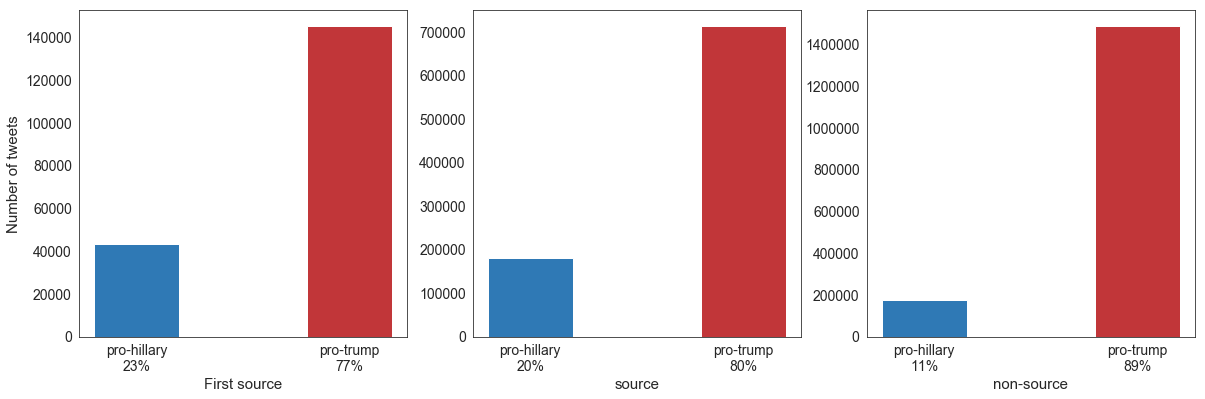

In [29]:
from collections import Counter
sns.set_style("white")
sns.color_palette("RdBu", n_colors=7)

count = Counter(first_opinion)
print(count)

label = ["pro-hillary", "pro-trump"]
plt.figure(figsize=(20, 6))

plt.subplot(131)
plt.bar(1, count[0], color=sns.color_palette("RdBu")[5], width=0.2)
plt.bar(1.5, count[1], color=sns.color_palette("RdBu")[0], width=0.2)
label = ["pro-hillary\n{0:.0%}".format(count[0] / (count[0]+count[1])), "pro-trump\n{0:.0%}".format(count[1] / (count[0]+count[1]))]
plt.xticks([1, 1.5], label)
plt.xlabel('First source', fontsize=15)
plt.ylabel('Number of tweets', fontsize=15)
plt.xticks(fontsize=14); plt.yticks(fontsize=14)

count = Counter(staters_opinion)
print(count)

plt.subplot(132)
plt.bar(1, count[0], color=sns.color_palette("RdBu")[5], width=0.2)
plt.bar(1.5, count[1], color=sns.color_palette("RdBu")[0], width=0.2)
label = ["pro-hillary\n{0:.0%}".format(count[0] / (count[0]+count[1])), "pro-trump\n{0:.0%}".format(count[1] / (count[0]+count[1]))]
plt.xticks([1, 1.5], label)
plt.xlabel('source', fontsize=15)
plt.xticks(fontsize=14); plt.yticks(fontsize=14)

count = Counter(other_opinion)
print(count)

plt.subplot(133)
plt.bar(1, count[0], color=sns.color_palette("RdBu")[5], width=0.2)
plt.bar(1.5, count[1], color=sns.color_palette("RdBu")[0], width=0.2)
label = ["pro-hillary\n{0:.0%}".format(count[0] / (count[0]+count[1])), "pro-trump\n{0:.0%}".format(count[1] / (count[0]+count[1]))]
plt.xticks([1, 1.5], label)
plt.xlabel('non-source', fontsize=15)
# plt.ylabel('N of fake sources', fontsize=15)
plt.xticks(fontsize=14); plt.yticks(fontsize=14)

plt.savefig("fig/support.pdf", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [9]:
uids_of_IRA = set(json.load(open("data/IRA_map.json")).values())

## 下面对fake-tweets.csv分析

In [7]:
from datetime import datetime

tweets_csv = pd.read_csv("data/fake-tweets.csv", dtype=str)
tweets_csv = tweets_csv.astype({"is_IRA": int, "is_first": int, "is_source": int, "dt": datetime})
tweets_csv.head()

,URL,dt,hostname,is_IRA,is_first,is_source,tweet_id,user_id
0,http://infowars.com/show,2016-04-29 10:51:25,infowars.com,0,1,1,726076431411761152,733838438
1,http://infowars.com/show,2016-05-24 12:42:06,infowars.com,0,0,1,735163983376719872,109065990
2,http://infowars.com/show,2016-05-26 19:02:31,infowars.com,0,0,1,735984491114565633,14505245
3,http://infowars.com/show,2016-05-27 11:35:43,infowars.com,0,0,1,736234437550080000,109065990
4,http://infowars.com/show,2016-06-01 16:20:17,infowars.com,0,0,0,738117991074660356,352537680


## tweets_csv有多少url，多少is_source，多少is_first

In [8]:
len(tweets_csv["URL"].unique()), len(tweets_csv["user_id"].unique())

(184297, 208367)

## * 基于用户的转发网络构建

In [26]:
retweet_network = json.load(open("data/fake_retweet_network.json"))

In [20]:
def save_network():
    G = nx.DiGraph()

    nodes = tweets_csv["user_id"].tolist()
    edges = []
    dict_tweetid_userid = {}
    for _, row in tweets_csv.iterrows():
        dict_tweetid_userid[row["tweet_id"]] = row["user_id"]
    
    for n2, n1 in retweet_network.items():
        u1 = dict_tweetid_userid[n1]
        u2 = dict_tweetid_userid[n2]
        edges.append((u1, u2))

    print("add nodes from ...")
    G.add_nodes_from(nodes)
    print("add edge from ...")
    G.add_edges_from(edges)
    nx.write_gpickle(G, "data/fake_network.gpickle")
    
save_network()


188949it [00:26, 22041.75it/s]

add nodes from ...
add edge from ...


In [22]:
G = nx.read_gpickle("data/fake_network.gpickle")

In [25]:
G.number_of_nodes()

208367

In [26]:
G.number_of_edges()

1031782

In [29]:
import graph_tool.all as gt

def save_network_gt():
    g = gt.Graph()

    nodes = tweets_csv["user_id"].tolist()
    node_map = {n:i for i, n in enumerate(nodes)}
    
    dict_tweetid_userid = {}
    for _, row in tweets_csv.iterrows():
        dict_tweetid_userid[row["tweet_id"]] = row["user_id"]
    
    print("add nodes from ...")
    vlist = g.add_vertex(len(nodes))
        
    edges = []
    print("add edge from ...")
    for n2, n1 in retweet_network.items():
        u1 = node_map[dict_tweetid_userid[n1]]
        u2 = node_map[dict_tweetid_userid[n2]]
        g.add_edge(g.vertex(u1), g.vertex(u2))

    g.save("data/fake_network.gt")
    
save_network_gt()

add nodes from ...
add edge from ...


In [262]:
g = gt.load_graph("data/fake_network.gt")

In [273]:
g.vp.CI_out[3]

0

In [65]:
from random import random

def deg_sample():
    if random() > 0.5:
        return np.random.poisson(4), np.random.poisson(4)
    else:
        return np.random.poisson(20), np.random.poisson(20)
    
g = gt.random_graph(100, deg_sample)
g.save("data/test_network.gt")

In [73]:
# test graph-tool

# import graph_tool.draw

g = gt.Graph()
g.add_vertex(3)
g.add_edge(g.vertex(0), g.vertex(1))
for v in g.vertices():
    print(v)
for e in g.edges():
    print(e)

0
1
2
(0, 1)


## Their CI rank

data/fake_winners.json

In [118]:
winners = json.load(open("data/fake_winners.json"))

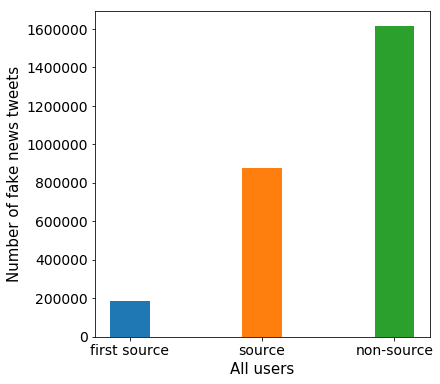

In [82]:
label = ["first source", "source", "non-source"]
plt.figure(figsize=(6, 6))

# plt.subplot(131)

plt.bar(1, len(tweets_csv[tweets_csv["is_first"]==1]), width=0.3)
plt.bar(2, len(tweets_csv[tweets_csv["is_source"]==1]), width=0.3)
plt.bar(3, len(tweets_csv[tweets_csv["is_source"]==0]), width=0.3)

plt.xticks([1, 2, 3], label)
plt.xlabel('All users', fontsize=15)
plt.ylabel('Number of fake news tweets', fontsize=15)
plt.xticks(fontsize=14); plt.yticks(fontsize=14)
plt.savefig("fig/N-of-all-users.pdf", dpi=300, bbox_inches='tight')
plt.show()
plt.tight_layout()
plt.close()

In [3]:
source_tweets = tweets_csv[tweets_csv["is_source"]==1]
"曾经为source的用户量", len(source_tweets["user_id"].unique())

('曾经为source的用户量', 84370)

### 分析fake news的source_content

In [14]:
import SQLite_handler
import importlib
importlib.reload(SQLite_handler)
    
tweet_ids = source_tweets["tweet_id"].tolist()
rsts = SQLite_handler.find_source(tweet_ids)

In [19]:
count = [r["source_content"] for r in rsts if r["source_content"] != -1]
_sum = len(count)
print("amount of tweets of which source can be found:", _sum)
count = Counter(count)

for k, v in count.most_common(20):
    print(k, '- {:.2%}'.format(v / _sum))

amount of tweets of which source can be found: 876655
Twitter Web Client - 33.36%
dlvr.it - 22.55%
Twitter for iPhone - 7.94%
Facebook - 7.71%
Twitter for Android - 5.80%
Twitter for iPad - 3.15%
Put your button on any page!  - 2.81%
Mobile Web - 2.48%
twitterfeed - 2.23%
IFTTT - 1.62%
Hootsuite - 1.04%
SocialOomph - 0.88%
Sprout Social - 0.86%
Linkis.com - 0.84%
Buffer - 0.64%
WordPress.com - 0.47%
Rignite - 0.41%
OS X - 0.32%
TweetDeck - 0.32%
Mobile Web (M5) - 0.26%


In [86]:
first_tweets = tweets_csv[tweets_csv["is_first"]==1]
"曾经为first source的用户量", len(first_tweets["user_id"].unique())

('曾经为first source的用户量', 24446)

In [31]:
ira_tweets = tweets_csv[tweets_csv["is_IRA"]==1]
'IRA用户量', len(ira_tweets["user_id"].unique())

('IRA用户量', 92)

说明并没有匿名用户存在，非常好

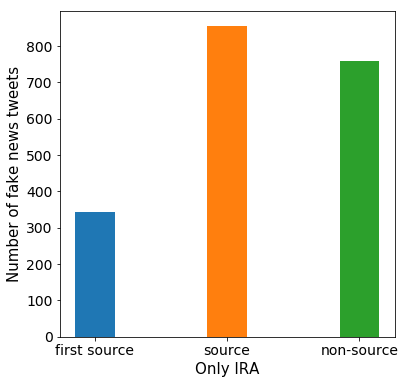

In [93]:
label = ["first source", "source", "non-source"]
plt.figure(figsize=(6, 6))

# plt.subplot(131)
plt.bar(1, len(ira_tweets[ira_tweets["is_first"]==1]), width=0.3)
plt.bar(2, len(ira_tweets[ira_tweets["is_source"]==1]), width=0.3)
plt.bar(3, len(ira_tweets[ira_tweets["is_source"]==0]), width=0.3)

# label = ["pro-hillary\n{0:.0%}".format(count[0] / (count[0]+count[1])), "pro-trump\n{0:.0%}".format(count[1] / (count[0]+count[1]))]
plt.xticks([1, 2, 3], label)
plt.xlabel('Only IRA', fontsize=15)
plt.ylabel('Number of fake news tweets', fontsize=15)
plt.xticks(fontsize=14); plt.yticks(fontsize=14)
plt.savefig("fig/N-of-only-IRA.pdf", dpi=300, bbox_inches='tight')
plt.show()
plt.tight_layout()
plt.close()

## The influence of IRAs in fake news spreading

### IRA涉及了哪些URL

In [94]:
ira_url = set(ira_tweets["URL"])
ira_first_url = set(ira_tweets[ira_tweets["is_first"]==1]["URL"])
ira_source_url = set(ira_tweets[ira_tweets["is_source"]==1]["URL"])
non_source_url = set(ira_tweets[ira_tweets["is_source"]==0]["URL"])

len(ira_url), len(ira_first_url), len(ira_source_url), len(non_source_url)

(1274, 344, 696, 600)

### IRA涉及的URL影响了多少其他人？

In [95]:
from tqdm import tqdm

cnt = 0
cnt_first = 0
cnt_source = 0
cnt_non = 0
for i, row in tqdm(tweets_csv.iterrows()):
    if row["URL"] in ira_url:
        cnt += 1
    if row["URL"] in ira_first_url:
        cnt_first += 1
    if row["URL"] in ira_source_url:
        cnt_source += 1
    if row["URL"] in non_source_url:
        cnt_non += 1
cnt, cnt_first, cnt_source, cnt_non

2492013it [02:15, 18381.03it/s]


(263591, 599, 74070, 202404)

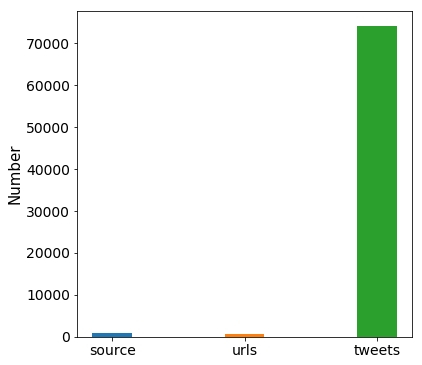

In [97]:
label = ["source", "urls", "tweets"]
plt.figure(figsize=(6, 6))

# plt.subplot(131)

plt.bar(1, len(ira_tweets[ira_tweets["is_source"]==1]), width=0.3)
plt.bar(2, len(ira_source_url), width=0.3)
plt.bar(3, cnt_source, width=0.3)

# label = ["pro-hillary\n{0:.0%}".format(count[0] / (count[0]+count[1])), "pro-trump\n{0:.0%}".format(count[1] / (count[0]+count[1]))]
plt.xticks([1, 2, 3], label)
# plt.xlabel('All users', fontsize=15)
plt.ylabel('Number', fontsize=15)
plt.xticks(fontsize=14); plt.yticks(fontsize=14)
# plt.yscale("log")
plt.savefig("fig/ira-source.pdf", dpi=300, bbox_inches='tight')
plt.show()
plt.tight_layout()
plt.close()

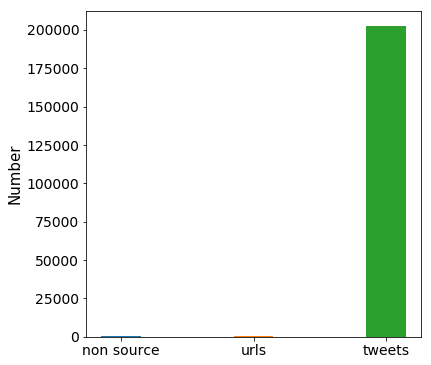

In [98]:
label = ["non source", "urls", "tweets"]
plt.figure(figsize=(6, 6))

# plt.subplot(131)

plt.bar(1, len(ira_tweets[ira_tweets["is_source"]==0]), width=0.3)
plt.bar(2, len(non_source_url), width=0.3)
plt.bar(3, cnt_non, width=0.3)

# label = ["pro-hillary\n{0:.0%}".format(count[0] / (count[0]+count[1])), "pro-trump\n{0:.0%}".format(count[1] / (count[0]+count[1]))]
plt.xticks([1, 2, 3], label)
# plt.xlabel('All users', fontsize=15)
plt.ylabel('Number', fontsize=15)
plt.xticks(fontsize=14); plt.yticks(fontsize=14)
# plt.yscale("log")
plt.savefig("fig/ira-source.pdf", dpi=300, bbox_inches='tight')
plt.show()
plt.tight_layout()
plt.close()

In [99]:
len(tweets_csv) / len(tweets_csv["URL"].unique())

13.521723088275989

In [100]:
len(ira_tweets[ira_tweets["is_source"]==1]) / len(ira_source_url)

1.228448275862069

In [101]:
cnt_non / len(non_source_url)

337.34

## IRA的被转发情况

In [102]:
all_tweets = pd.read_csv("data/ira_tweets_csv_hashed.csv", 
                         usecols=["tweetid", "userid", "retweet_count"])

In [104]:
ira_id = set(ira_tweets[ira_tweets["is_source"] == 1]["tweet_id"])
df = all_tweets.loc[all_tweets['tweetid'].isin(ira_id)]
df.describe()

,tweetid,retweet_count
count,8.550000e+02,855.000000
mean,7.816363e+17,9.987135
std,1.369839e+16,44.360178
min,7.345768e+17,0.000000
25%,7.769366e+17,0.000000
50%,7.818376e+17,0.000000
75%,7.942575e+17,1.000000
max,7.961374e+17,640.000000


# 用户分析 （Group）

In [20]:
user_count = pd.value_counts(tweets_csv["user_id"]).rename("is_fake")
user_count.head(25)
# type(user_count)

4855687055            8738
4831603043            7334
3374126201            4844
2242085304            4732
122455671             3738
758652815996776448    2956
4906718786            2908
2462473820            2879
750517084166193156    2766
382921457             2707
751963872899305472    2703
1075296265            2605
60893069              2594
759317433345769472    2491
825501626             2476
763982421297553408    2405
707278892801765377    2376
2700350600            2338
746875038901633024    2324
766499969696169984    2321
755614943039352832    2189
3274720530            2169
4857584175            2158
763518863212511232    2136
765648314159210496    2112
Name: is_fake, dtype: int64

## TOP sources

In [21]:
user_sources_count = tweets_csv["is_source"].groupby(tweets_csv["user_id"]).sum().sort_values(ascending=False)
user_sources_count.head(25)

user_id
4855687055            8610
4831603043            7332
3374126201            4844
2242085304            4732
122455671             3738
758652815996776448    2955
2462473820            2878
4906718786            2827
750517084166193156    2766
382921457             2706
751963872899305472    2702
1075296265            2605
60893069              2520
759317433345769472    2486
825501626             2460
763982421297553408    2405
707278892801765377    2376
2700350600            2338
746875038901633024    2324
766499969696169984    2321
755614943039352832    2189
4857584175            2158
763518863212511232    2136
3274720530            2128
765648314159210496    2112
Name: is_source, dtype: int64

In [22]:
user_sources_count["4855687055"]

8610

In [50]:
for uid in user_sources_count.head(25).index:
    try:
        print(uid, winners.index(uid) + 1)
    except:
        print(uid, -1)

4855687055 -1
4831603043 -1
3374126201 -1
2242085304 -1
122455671 -1
758652815996776448 -1
2462473820 -1
4906718786 -1
750517084166193156 -1
382921457 -1
751963872899305472 -1
1075296265 -1
60893069 -1
759317433345769472 -1
825501626 -1
763982421297553408 -1
707278892801765377 -1
2700350600 -1
746875038901633024 -1
766499969696169984 -1
755614943039352832 -1
4857584175 -1
763518863212511232 -1
3274720530 -1
765648314159210496 -1


## TOP first sources

In [23]:
user_first_count = tweets_csv["is_first"].groupby(tweets_csv["user_id"]).sum().sort_values(ascending=False)
user_first_count.head(25)

user_id
122455671             3701
4831603043            2481
60893069              2079
4496549793            1814
825501626             1689
3274720530            1683
3374126201            1565
14210021              1451
137637040             1102
18856867              1085
18208120              1028
138092553              916
634330366              881
112732163              851
359122436              781
1494835716             775
166721424              763
1246177122             759
2270900414             744
3326947147             733
2507996790             708
386235552              682
750517084166193156     679
4578277935             674
466090255              674
Name: is_first, dtype: int64

In [52]:
for uid in user_first_count.head(25).index:
    try:
        print(uid, winners.index(uid) + 1)
    except:
        print(uid, -1)

122455671 -1
4831603043 -1
60893069 -1
4496549793 -1
825501626 -1
3274720530 -1
3374126201 -1
14210021 -1
137637040 -1
18856867 -1
18208120 -1
138092553 -1
634330366 -1
112732163 -1
359122436 -1
1494835716 -1
166721424 -1
1246177122 -1
2270900414 -1
3326947147 -1
2507996790 -1
386235552 -1
750517084166193156 -1
4578277935 -1
466090255 -1


In [33]:
users = pd.concat([user_count, user_first_count, user_sources_count], axis=1, sort=False)
users["source_rate"] = users["is_source"] / users["is_fake"]
users["first_rate"] = users["is_first"] / users["is_fake"]
users["first_source_rate"] = users["is_first"] / users["is_source"]
users = users.fillna(0)
users.head()

,is_fake,is_first,is_source,source_rate,first_rate,first_source_rate
4855687055,8738,327,8610,0.985351,0.037423,0.037979
4831603043,7334,2481,7332,0.999727,0.338287,0.338380
3374126201,4844,1565,4844,1.000000,0.323080,0.323080
2242085304,4732,183,4732,1.000000,0.038673,0.038673
122455671,3738,3701,3738,1.000000,0.990102,0.990102


## 根据Get_User爬虫获取的信息进一步补充users数据项

In [34]:
user_info = pd.DataFrame([json.loads(line.strip()) for line in open("data/fake-users-info.json")])
user_info = user_info.rename(columns={'id_str': 'user_id'})
user_info = user_info.set_index("user_id")

In [35]:
tmp = pd.concat([users, user_info], axis=1, join="inner")
tmp["message"].fillna("User going well.", inplace=True)

In [30]:
tmp.to_csv("data/fake_users.csv")

# 全面分析涉及到的用户特征

In [36]:
users = tmp
# users = pd.read_csv("data/fake_users.csv")

In [45]:
# 用户已经被注销的那些tweets

tweets_csv[tweets_csv["user_id"].isin(users[users["message"]!="User going well."].index)]["tweet_id"].to_csv("data/tweets_id_user_not_found.csv")

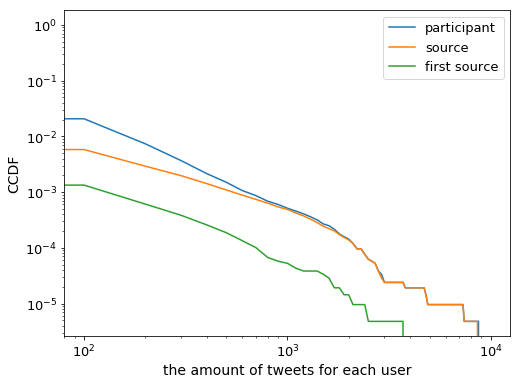

In [303]:
def get_cdf_pdf(data, mini, maxi, step, norm=True):
    x = [float(i) for i in np.arange(mini, maxi, step)]
    cdf = [0] * len(x)
    pdf = [0] * len(x)
    count = 0
    for d in data:
        d = float(d)
        if d < mini or d > maxi:
            continue
        count += 1
        for i in range(len(x)):
            if i == (len(x) - 1) and d >= x[i]:
                pdf[i] += 1
            elif d >= x[i] and d < x[i+1]:
                pdf[i] += 1

            if d >= x[i]:
                cdf[i] += 1

    if norm:
        cdf = [c / count for c in cdf]
        pdf = [p / count for p in pdf]

    return x, cdf, pdf

plt.figure(figsize=(8, 6))
x, cdf, pdf = get_cdf_pdf(users["is_fake"], 0, 10000, 100)
plt.plot(x, cdf, label="participant")
x, cdf, pdf = get_cdf_pdf(users["is_source"], 0, 10000, 100)
plt.plot(x, cdf, label="source")
x, cdf, pdf = get_cdf_pdf(users["is_first"], 0, 10000, 100)
plt.plot(x, cdf, label="first source")
# plt.title('Distribution of size of fake news ', fontsize=15)
plt.ylabel('CCDF', fontsize=14)
plt.xlabel('the amount of tweets for each user', fontsize=14)
plt.xticks(fontsize=13); plt.yticks(fontsize=13)
plt.yscale("log")
plt.xscale("log")
plt.legend(fontsize=13)
plt.savefig('fig/distribution_starters.pdf', dpi=300)
plt.show()
plt.close()

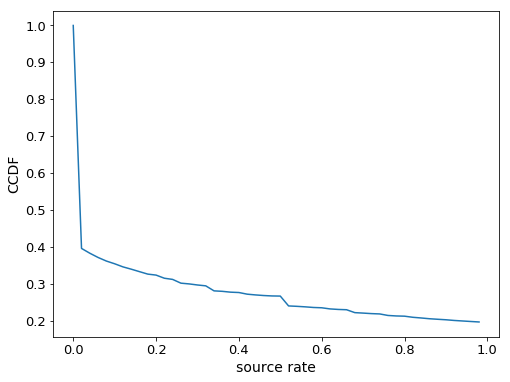

In [294]:
plt.figure(figsize=(8, 6))
x, cdf, pdf = get_cdf_pdf(users["source_rate"], 0, 1, 0.02)
plt.plot(x, cdf)
plt.ylabel('CCDF', fontsize=14)
plt.xlabel('source rate', fontsize=14)
plt.xticks(fontsize=13); plt.yticks(fontsize=13)
# plt.yscale("log"); plt.xscale("log")
plt.savefig('fig/distribution_starters.pdf', dpi=300)
plt.show()
plt.close()

## 用户分类source top500与其他用户

为了研究source users的特点，需要进行对比，目前用户都是跟fake news有关（至少发布一条），选择其他剩余的全部用户作为对比组

In [99]:
top_users = users.sort_values("is_source", ascending=False).head(500)
top_users.to_csv("data/top500-fake-source-users.csv") # save top 500
other_users = users.sort_values("is_source", ascending=False).iloc[500:]

In [101]:
users["is_source_top"] = (users["is_fake"] >= 242)

## 0. 多少用户被suspened，或not found 

In [9]:
users[users["message"]!="User going well."]

NameError: name 'users' is not defined

In [123]:
prop_df = (users["message"]
           .groupby(users["is_source_top"])
           .value_counts(normalize=True)
           .rename("Prop")
           .reset_index())

In [124]:
prop_df

,is_source_top,message,Prop
0,False,User going well.,0.827816
1,False,User has been suspended.,0.093130
2,False,User not found.,0.079055
3,True,User going well.,0.720036
4,True,User has been suspended.,0.238819
5,True,User not found.,0.041145


In [129]:
users["message"].value_counts()

User going well.            172369
User has been suspended.     19568
User not found.              16430
Name: message, dtype: int64

User going well.            0.827238
User has been suspended.    0.093911
User not found.             0.078851
Name: message, dtype: float64


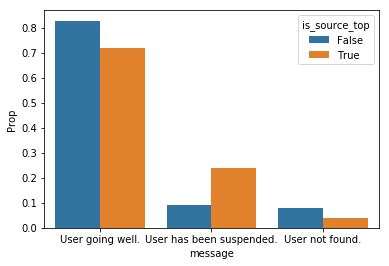

In [125]:
# cnt_not_found = len(users[users["code"]==50]) # 50 not found
# cnt_suspened = len(users[users["code"]==63]) # 63 suspened
# cnt_exists = len(users) - cnt_not_found - cnt_suspened

# height = [cnt_exists, cnt_suspened, cnt_not_found]
# bars = ('exists', 'suspened', 'not found')
# y_pos = np.arange(len(bars))
# plt.xticks(y_pos, bars)
# plt.bar(y_pos, height)

sns.barplot(x="message", y="Prop", data=prop_df, hue="is_source_top")
# users["message"].fillna("User going well.", inplace=True)
print(users["message"].value_counts(normalize=True))

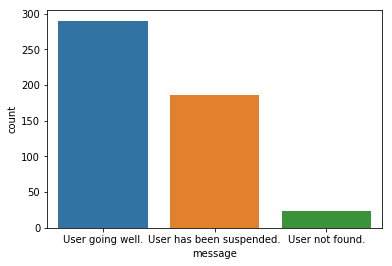

In [130]:
sns.countplot(x="message", data=top_users)

### 检查为什么会存在not found 

<span style="color:red">*已经用账号testkaykaykay进行测试，发现是自己主动deactive the account*</span>

所以suspened和not found的用户在传播过程中是非常重要的，我们不能放过对他们的研究。

In [248]:
uids_not_found = users[users["code"]==50].index

In [255]:
uids_not_found

Index(['137637040', '2711204024', '501567221', '2330112218', '356324005',
       '753082489711816704', '4856642956', '292586544', '4895096885',
       '105604742',
       ...
       '90271735', '734874821759229952', '3053971999', '371334115',
       '154234924', '136617688', '896136019', '2744985801', '307481163',
       '700050080'],
      dtype='object', length=16430)

In [254]:
importlib.reload(SQLite_handler)

<module 'SQLite_handler' from '/home/alex/kayzhou/election/SQLite_handler.py'>

In [256]:
users_data_not_found = SQLite_handler.find_users(uids_not_found)

In [275]:
c = 0
for u in users_data_not_found:
    if "error" in u:
        print(u)
        c += 1
c

{'user_id': '612933174', 'error': 'not found'}
{'user_id': '274551374', 'error': 'not found'}
{'user_id': '3271339802', 'error': 'not found'}
{'user_id': '757449025243131904', 'error': 'not found'}
{'user_id': '706122184985600000', 'error': 'not found'}
{'user_id': '2928819864', 'error': 'not found'}
{'user_id': '4418720713', 'error': 'not found'}
{'user_id': '2201548476', 'error': 'not found'}
{'user_id': '78047698', 'error': 'not found'}


9

In [258]:
users_data_not_found_large = SQLite_handler.find_users_from_large(uids_not_found)

In [273]:
c = 0
for u in users_data_not_found_large:
    if "error" in u:
        c += 1
c

2974

有2974在users.db中没有找到，其中9个用户在alex.db没有找到，可能是IRA

## 1. 地区及语言

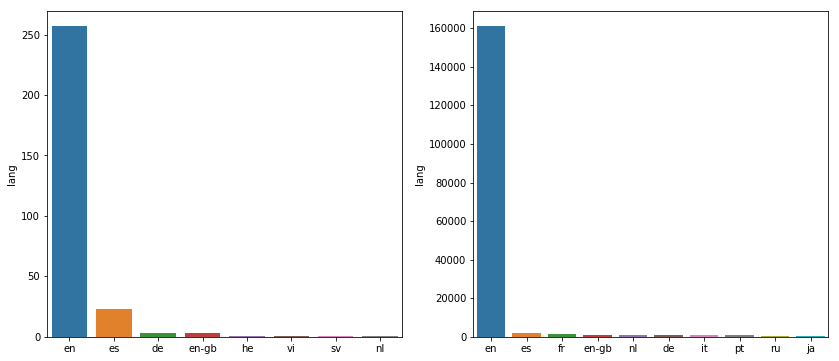

In [138]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
x = top_users.lang.value_counts()[:10]
sns.barplot(x=x.index, y=x)
plt.subplot(122)
x = other_users.lang.value_counts()[:10]
sns.barplot(x=x.index, y=x)

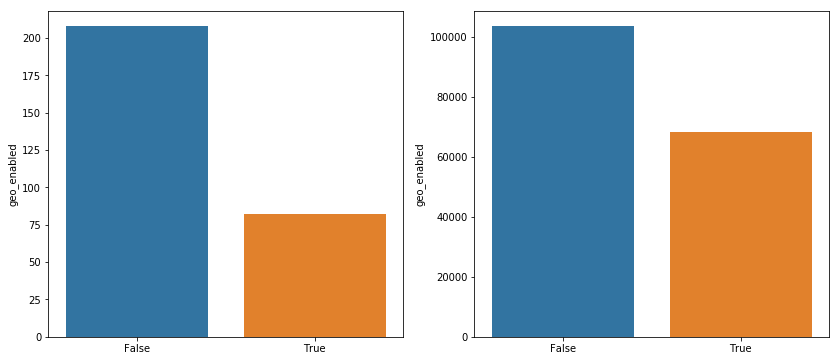

In [142]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
x = top_users.geo_enabled.value_counts()
sns.barplot(x=x.index, y=x)
plt.subplot(122)
x = other_users.geo_enabled.value_counts()
sns.barplot(x=x.index, y=x)

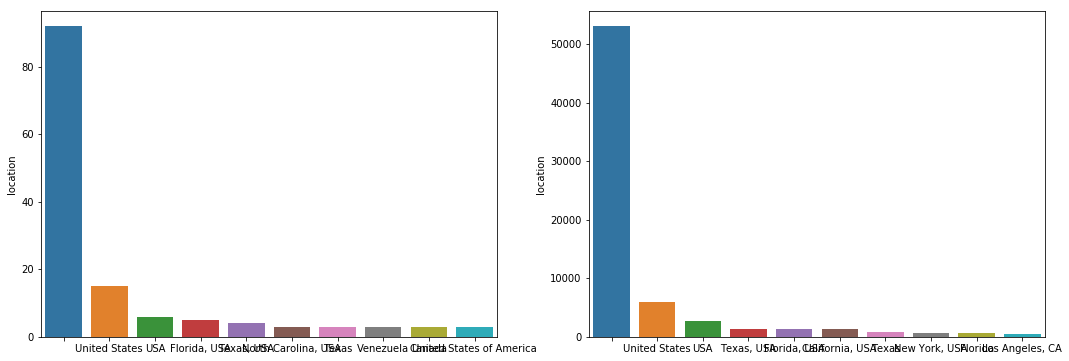

In [146]:
plt.figure(figsize=(18, 6))
plt.subplot(121)
x = top_users.location.value_counts()[:10]
# print(top_users.location.value_counts())
sns.barplot(x=x.index, y=x)
plt.subplot(122)
x = other_users.location.value_counts()[:10]
# print(other_users.location.value_counts())
sns.barplot(x=x.index, y=x)

# 2. 是否为验证用户 

False    288
True       2
Name: verified, dtype: int64
False    171331
True        748
Name: verified, dtype: int64


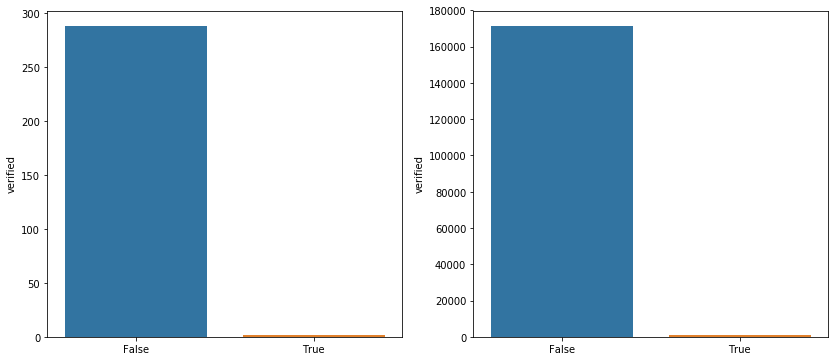

In [148]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
x = top_users.verified.value_counts()
print(x)
sns.barplot(x=x.index, y=x)
plt.subplot(122)
x = other_users.verified.value_counts()
print(x)
sns.barplot(x=x.index, y=x)

In [310]:
top_users = users.sort_values("is_source", ascending=False).head(500)
top_users.to_csv("data/top-fake-source-users.csv") # save top 500

# 3. fake news指标上的数值

In [307]:
top_users.describe()

,is_fake,is_first,is_source,source_rate,first_rate,first_source_rate,code,favourites_count,followers_count,friends_count,id,listed_count,statuses_count,time_zone,utc_offset
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,210.000000,290.000000,290.000000,290.000000,5.000000e+02,290.000000,2.900000e+02,0.0,0.0
mean,762.926000,169.300000,735.654000,0.960769,0.236179,0.243625,61.452381,19108.682759,19948.996552,10876.831034,2.382561e+17,273.306897,1.508388e+05,NaN,NaN
std,774.666688,317.297238,770.916332,0.096048,0.296095,0.300387,4.220039,39534.300396,70624.566055,29152.609896,3.526803e+17,1075.046048,1.835696e+05,NaN,NaN
min,242.000000,0.000000,242.000000,0.158537,0.000000,0.000000,50.000000,0.000000,22.000000,0.000000,1.267113e+07,0.000000,0.000000e+00,NaN,NaN
25%,352.750000,18.000000,326.500000,0.974556,0.031736,0.035021,63.000000,24.500000,853.000000,550.250000,1.978720e+08,30.250000,4.066850e+04,NaN,NaN
50%,495.500000,60.000000,463.000000,1.000000,0.101484,0.105237,63.000000,1546.000000,4226.000000,2961.000000,2.222342e+09,97.500000,9.859950e+04,NaN,NaN
75%,868.750000,189.250000,832.250000,1.000000,0.308026,0.319565,63.000000,21422.500000,14281.500000,9325.000000,7.512894e+17,232.500000,1.787560e+05,NaN,NaN
max,8738.000000,3701.000000,8610.000000,1.000000,1.000000,1.000000,63.000000,443492.000000,929739.000000,367616.000000,7.909311e+17,16015.000000,1.045437e+06,NaN,NaN


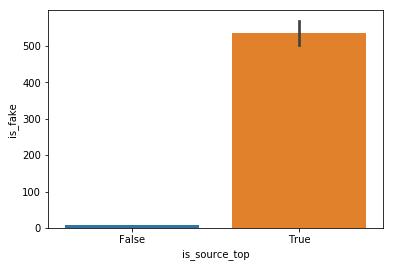

In [153]:
sns.barplot(x="is_source_top", y="is_fake", data=users, estimator=np.mean)

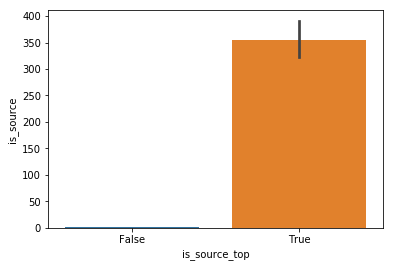

In [154]:
sns.barplot(x="is_source_top", y="is_source", data=users, estimator=np.mean)

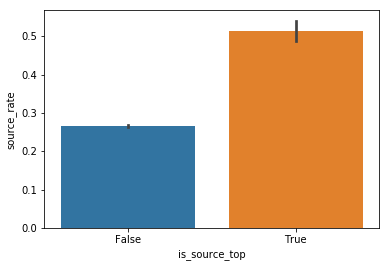

In [163]:
sns.barplot(x="is_source_top", y="source_rate", data=users, estimator=np.mean)

# 4. 基本统计数据上的数值

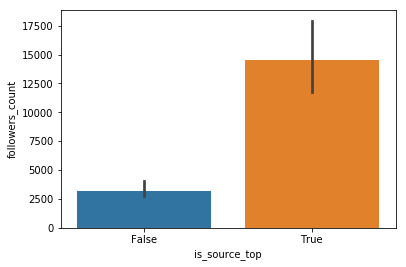

In [156]:
sns.barplot(x="is_source_top", y="followers_count", data=users, estimator=np.mean)

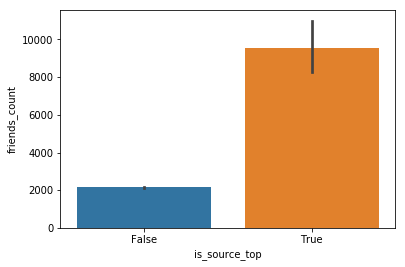

In [158]:
sns.barplot(x="is_source_top", y="friends_count", data=users, estimator=np.mean)

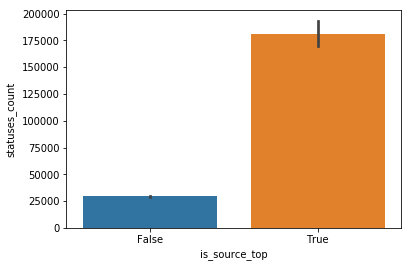

In [159]:
sns.barplot(x="is_source_top", y="statuses_count", data=users, estimator=np.mean)

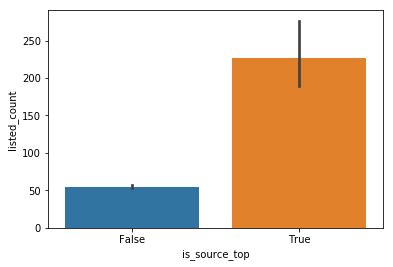

In [160]:
sns.barplot(x="is_source_top", y="listed_count", data=users, estimator=np.mean)

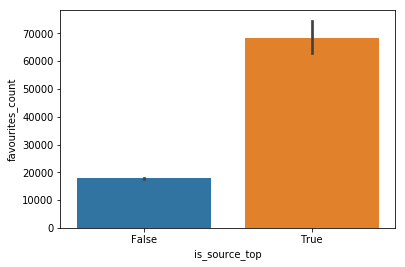

In [162]:
sns.barplot(x="is_source_top", y="favourites_count", data=users, estimator=np.mean)

# 5. CI与source的关系

In [296]:
nodes = tweets_csv["user_id"].tolist()
node_map = {n:i for i, n in enumerate(nodes)}

In [297]:
CI_rst = np.load("data/CI_rst/CI_out_fake_network.gt.npy")

In [298]:
CI_rank_rst = CI_rst[0][0:1000]
CI_values_rst = CI_rst[1]

In [299]:
CI_index = []
CI_rank_values = []
CI_values = []

for user_id, row in users.iterrows():
    node_id = node_map[user_id]
    try:
        i = CI_rank_rst.index(node_id)
        rank = 1000 - i
    except ValueError as e:
        rank = 0

    val = CI_values_rst[node_id]
    # print("->", user_id, rank, val)
    CI_index.append(user_id)
    CI_rank_values.append(rank)
    CI_values.append(val)

CI_rank = pd.Series(CI_rank_values, index=CI_index)
CI_values = pd.Series(CI_values, index=CI_index)
users["CI_rank"] = pd.Series(CI_rank)
users["CI_values"] = pd.Series(CI_values)

/home/alex/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


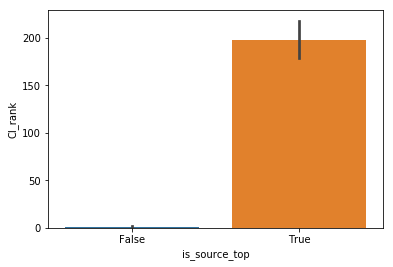

In [300]:
sns.barplot(x="is_source_top", y="CI_rank", data=users, estimator=np.mean)

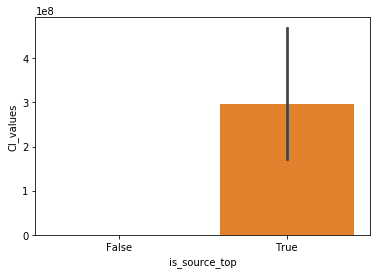

In [301]:
sns.barplot(x="is_source_top", y="CI_values", data=users, estimator=np.mean)

In [302]:
source_CI = pd.DataFrame({"CI_rank": users["CI_rank"],
                          "CI_values": users["CI_values"],
                          "is_source": users["is_source"],
                          "source_rate": users["source_rate"]})

In [303]:
source_CI.corr()

,CI_rank,CI_values,is_source,source_rate
CI_rank,1.000000,0.257452,0.488942,0.082084
CI_values,0.257452,1.000000,0.328691,0.016954
is_source,0.488942,0.328691,1.000000,0.109910
source_rate,0.082084,0.016954,0.109910,1.000000


In [304]:
# 顺便这里把IRA做一下

ira_users = users.loc[ira_tweets["user_id"].unique()]

In [305]:
ira_users[ira_users["CI_rank"] > 0]

,is_fake,is_first,is_source,source_rate,first_rate,first_source_rate,code,contributors_enabled,created_at,default_profile,...,statuses_count,time_zone,translator_type,url,utc_offset,verified,withheld_in_countries,is_source_top,CI_rank,CI_values
4437444442,5,0,5,1.000000,0.000000,0.000000,63.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,305,3486230
4272870988,23,3,22,0.956522,0.130435,0.136364,63.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,606,19000410
4224729994,18,9,17,0.944444,0.500000,0.529412,63.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,717,45916704
4289431230,5,0,5,1.000000,0.000000,0.000000,63.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,342,4104793
4355797094,6,1,6,1.000000,0.166667,0.166667,63.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,320,3662592
789266125485998080,223,29,223,1.000000,0.130045,0.130045,63.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,92,1299480
4311371968,11,2,10,0.909091,0.181818,0.200000,63.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,385,5149200


In [291]:
ira_users.describe()

,is_fake,is_first,is_source,source_rate,first_rate,first_source_rate,code,favourites_count,followers_count,friends_count,id,listed_count,statuses_count,time_zone,utc_offset,CI_rank,CI_values
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.0,0.0,0.0,0.0,9.200000e+01,0.0,0.0,0.0,0.0,92.00000,9.200000e+01
mean,17.706522,3.739130,9.336957,0.537902,0.174323,inf,63.0,NaN,NaN,NaN,4.026391e+16,NaN,NaN,NaN,NaN,15.50000,2.367963e+06
std,40.342092,8.527743,26.549261,0.369736,0.242284,NaN,0.0,NaN,NaN,NaN,1.690001e+17,NaN,NaN,NaN,NaN,84.76775,1.469957e+07
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.0,NaN,NaN,NaN,1.513801e+09,NaN,NaN,NaN,NaN,0.00000,0.000000e+00
25%,1.000000,0.000000,1.000000,0.279720,0.000000,0.000000,63.0,NaN,NaN,NaN,1.671006e+09,NaN,NaN,NaN,NaN,0.00000,0.000000e+00
50%,4.000000,1.000000,2.000000,0.500000,0.102302,0.183333,63.0,NaN,NaN,NaN,2.492015e+09,NaN,NaN,NaN,NaN,0.00000,0.000000e+00
75%,15.500000,2.250000,7.000000,1.000000,0.254332,0.582543,63.0,NaN,NaN,NaN,2.932521e+09,NaN,NaN,NaN,NaN,0.00000,0.000000e+00
max,228.000000,54.000000,223.000000,1.000000,1.000000,inf,63.0,NaN,NaN,NaN,7.892661e+17,NaN,NaN,NaN,NaN,620.00000,1.295445e+08


In [293]:
## 明天把数据都补充上！这下就更牛逼了！

___
# 全部数据！ 包括bias, fake, center等等

In [47]:
%time all_tweets = pd.read_csv("disk/all-tweets.csv", dtype=str)

CPU times: user 1min 24s, sys: 3.92 s, total: 1min 28s
Wall time: 1min 28s


## fake 分析 

In [52]:
all_tweets["fake"].value_counts()

GOOD    31800728
BIAS     3371913
FAKE     2489941
Name: fake, dtype: int64

In [57]:
fake_tweets = all_tweets[all_tweets["fake"] == "FAKE"]

In [58]:
fake_tweets

,URL,dt,fake,hostname,is_IRA,is_first,is_source,polarity,tweet_id,user_id
571145,http://infowars.com/show,2016-04-29 10:51:25,FAKE,infowars.com,0,1,1,ANTISCIENCE,726076431411761152,733838438
571146,http://infowars.com/show,2016-05-24 12:42:06,FAKE,infowars.com,0,0,1,ANTISCIENCE,735163983376719872,109065990
571147,http://infowars.com/show,2016-05-26 19:02:31,FAKE,infowars.com,0,0,1,ANTISCIENCE,735984491114565633,14505245
571148,http://infowars.com/show,2016-05-27 11:35:43,FAKE,infowars.com,0,0,1,ANTISCIENCE,736234437550080000,109065990
571149,http://infowars.com/show,2016-06-01 16:20:17,FAKE,infowars.com,0,0,0,ANTISCIENCE,738117991074660356,352537680
571150,http://infowars.com/show,2016-06-01 17:09:51,FAKE,infowars.com,0,0,0,ANTISCIENCE,738130465551355904,705518452035997698
571151,http://infowars.com/show,2016-06-02 11:07:02,FAKE,infowars.com,0,0,1,ANTISCIENCE,738401546002538496,109065990
571152,http://infowars.com/show,2016-06-02 11:07:23,FAKE,infowars.com,0,0,0,ANTISCIENCE,738401637371420673,4921258114
571153,http://infowars.com/show,2016-06-02 11:07:28,FAKE,infowars.com,0,0,0,ANTISCIENCE,738401658271588352,2426872238
571154,http://infowars.com/show,2016-06-02 11:07:31,FAKE,infowars.com,0,0,0,ANTISCIENCE,738401671361990657,725448266867970049


## polarity 分析

In [53]:
all_tweets["polarity"].value_counts()

LEFTCENTER     13646055
LEFT            7990382
RIGHT           6841486
-1              3663201
RIGHTCENTER     2808406
CENTER          1407988
ANTISCIENCE     1245821
PROSCIENCE        59243
Name: polarity, dtype: int64